In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
risk_group_mapping = pd.DataFrame(columns=['Risk_group', 'Decision', 'State_variable_VUL', 'State_variable_SES'])
risk_group_mapping['Risk_group'] = ['g0-00', 'g0-01', 'g0-10', 'g0-11', 'g1-00', 'g1-01', 'g1-10', 'g1-11']
risk_group_mapping['Decision'] = ['not-work', 'not-work', 'not-work', 'not-work',
                                  'work', 'work', 'work', 'work']
risk_group_mapping['State_variable_VUL'] = ['not-vulnerable', 'not-vulnerable', 'vulnerable', 'vulnerable',
                                            'not-vulnerable', 'not-vulnerable', 'vulnerable', 'vulnerable']
risk_group_mapping['State_variable_SES'] = ['high-SES', 'low-SES', 'high-SES', 'low-SES',
                                            'high-SES', 'low-SES', 'high-SES', 'low-SES']

In [3]:
def process_df(df, para, para_vec):
    df = df[df[para].isin(para_vec) ].reset_index().drop(columns = ['index'])
    df = df[df['time'] > 0].reset_index().drop(columns = ['index'])
    df_pro = df[['time', para]].drop_duplicates().reset_index().drop(columns = ['index'])
    
    df_pro = df_pro.merge(df[df['infection_status'] == 'i']\
    .groupby([para, 'time', 'infection_status']).sum().reset_index()[['time', para, 'count']])
    df_pro = df_pro.rename(columns = {'count': '%I'})
    df_pro['%I'] = df_pro['%I']/16000
    
    df_pro = df_pro.merge(df[df['infection_status'] == 's']\
    .groupby([para, 'time', 'infection_status']).sum().reset_index()[['time', para, 'count']])
    df_pro = df_pro.rename(columns = {'count': '%S'})
    df_pro['%S'] = df_pro['%S']/16000
    
    df_pro = df_pro.merge(df[df['infection_status'] == 'r']\
    .groupby([para, 'time', 'infection_status']).sum().reset_index()[['time', para, 'count']])
    df_pro = df_pro.rename(columns = {'count': '%R'})
    df_pro['%R'] = df_pro['%R']/16000
    
    df_pro = df_pro.merge(df[(df['risk_group'].str[:2] == 'g1')&\
          (df['infection_status'] == 'i')].groupby([para, 'time']).sum().reset_index()[['time', para, 'count']])
    df_pro = df_pro.rename(columns = {'count': 'I_work'})
    df_pro['%I_work'] = df_pro['I_work']/(df_pro['%I']*16000)
    
    df_pro = df_pro.merge(df[(df['risk_group'].str[:2] == 'g1')&\
          (df['infection_status'] == 's')].groupby([para, 'time']).sum().reset_index()[['time', para, 'count']])
    df_pro = df_pro.rename(columns = {'count': 'S_work'})
    df_pro['%S_work'] = df_pro['S_work']/(df_pro['%S']*16000)
    
    df_pro = df_pro.merge(df[(df['risk_group'].str[:2] == 'g1')&\
          (df['infection_status'] == 'r')].groupby([para, 'time']).sum().reset_index()[['time', para, 'count']])
    df_pro = df_pro.rename(columns = {'count': 'R_work'})
    df_pro['%R_work'] = df_pro['R_work']/(df_pro['%R']*16000)
    
    df_pro = df_pro.merge(df[(df['risk_group'].str[:2] == 'g1')]\
    .groupby([para, 'time']).sum().reset_index()[['time', para, 'count']])
    df_pro = df_pro.rename(columns = {'count': '%work'})
    df_pro['%work'] = df_pro['%work']/16000
    
    return df_pro

In [5]:
df_income = pd.read_csv('sensitivity_analysis/processed_results/wage_gap.csv')
df_income_pro = process_df(df_income, 'model', df_income['model'].unique())
df_income_pro = df_income_pro.sort_values(by = [ 'model', 'time']).reset_index().drop(columns = ['index'])

df_base = df_income_pro[df_income_pro['model'] == '100%']

### beta
df_beta = pd.read_csv('sensitivity_analysis/processed_results/beta.csv')
df_beta_pro = process_df(df_beta, 'model', df_beta['model'].unique())
df_beta_pro = df_beta_pro.sort_values(by = ['time', 'model']).reset_index().drop(columns = ['index'])

#### pc
df_pc = pd.read_csv('sensitivity_analysis/processed_results/pc.csv')
df_pc_pro = process_df(df_pc, 'model', df_pc['model'].unique())
df_pc_pro = df_pc_pro.sort_values(by = ['time', 'model']).reset_index().drop(columns = ['index'])

#### theta_x
df_theta_x = pd.read_csv('sensitivity_analysis/processed_results/theta_x.csv')
df_theta_x_pro = process_df(df_theta_x, 'model', df_theta_x['model'].unique())
df_theta_x_pro = df_theta_x_pro.sort_values(by = ['time', 'model']).reset_index().drop(columns = ['index'])

#### r2
df_r2 = pd.read_csv('sensitivity_analysis/processed_results/contact_matrix.csv')
df_r2_pro = process_df(df_r2, 'model', df_r2['model'].unique())
df_r2_pro = df_r2_pro.sort_values(by = ['time', 'model']).reset_index().drop(columns = ['index'])

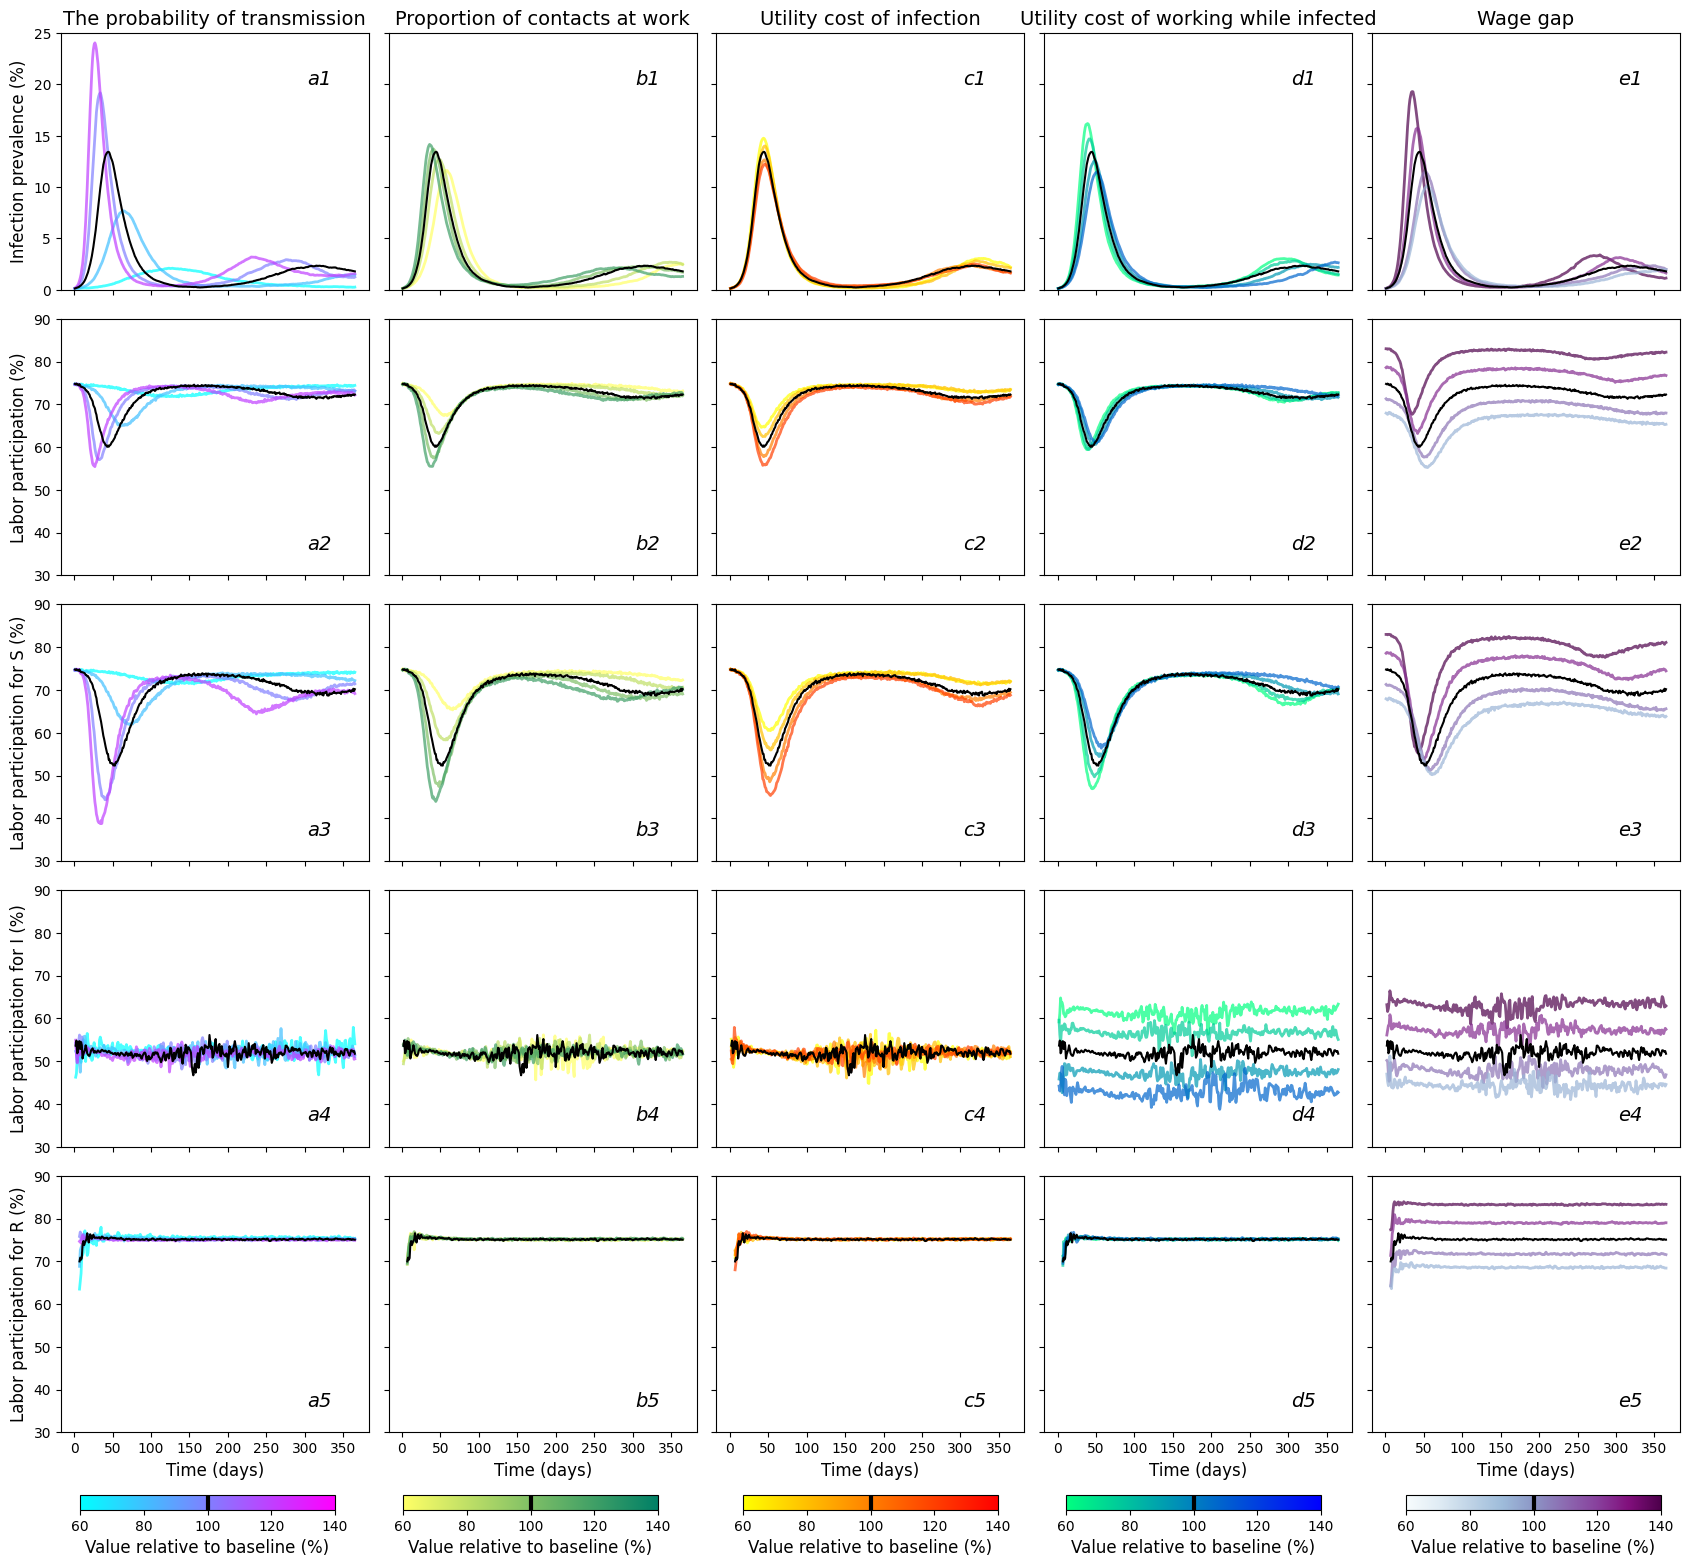

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define color maps and values
cmap_sub = plt.cm.cool
values_sub = np.linspace(0, 1, 5)
colors_sub = cmap_sub(values_sub)

cmap_theta_x = plt.cm.summer.reversed()
values_theta_x = np.linspace(0, 1, 5)
colors_theta_x = cmap_theta_x(values_theta_x)

cmap_pc = plt.cm.autumn.reversed()
values_pc = np.linspace(0, 1, 5)
colors_pc = cmap_pc(values_pc)

cmap_r2 = plt.cm.winter.reversed()
values_r2 = np.linspace(0, 1, 6)
colors_r2 = cmap_r2(values_r2)

cmap_beta = plt.cm.BuPu.reversed()
values_beta = np.linspace(0, 1, 6)
colors_beta = cmap_beta(values_beta)

# Create subplots
fig, axs = plt.subplots(5, 5, figsize=(17, 15), sharex=True)
alpha = 0.7

# Define data and colors
data_pro = [
    (df_beta_pro, colors_sub, '{} of baseline infection rate', 0),
    (df_r2_pro, colors_theta_x, '{} of baseline times more contacts at work', 1),
    (df_theta_x_pro, colors_pc, '{} of basline cost of infection', 2),
    (df_pc_pro, colors_r2, '{} of baseline penalty for work if infected', 3),
    (df_income_pro, colors_beta, '{} of baseline wage gap', 4)
]

# Plot data
for df, colors, label_template, col in data_pro:
    for i, sub in enumerate(['60%', '80%', '120%', '140%']):
        axs[0, col].plot(df[df['model'] == sub]['time'], 
                         df[df['model'] == sub]['%I']*100, 
                         color=colors[i], alpha=alpha, label=label_template.format(sub), linewidth=2)

for df, colors, label_template, col in data_pro:
    for i, sub in enumerate(['60%', '80%', '120%', '140%']):
        axs[1, col].plot(df[df['model'] == sub]['time'], 
                         df[df['model'] == sub]['%work']*100, 
                         color=colors[i], alpha=alpha,linewidth=2)
        
for df, colors, label_template, col in data_pro:
    for i, sub in enumerate(['60%', '80%', '120%', '140%']):
        axs[2, col].plot(df[df['model'] == sub]['time'], 
                         df[df['model'] == sub]['%S_work']*100, 
                         color=colors[i], alpha=alpha, linewidth=2)
        
for df, colors, label_template, col in data_pro:
    for i, sub in enumerate(['60%', '80%', '120%', '140%']):
        axs[3, col].plot(df[df['model'] == sub]['time'], 
                         df[df['model'] == sub]['%I_work'].rolling(window=2).mean()*100, 
                         color=colors[i], alpha=alpha, linewidth=2)
        
for df, colors, label_template, col in data_pro:
    for i, sub in enumerate(['60%', '80%', '120%', '140%']):
        axs[4, col].plot(df[df['model'] == sub]['time'][5:], 
                         df[df['model'] == sub]['%R_work'][5:].rolling(window=2).mean()*100, 
                         color=colors[i], alpha=alpha, linewidth=2)
        
# Plot baseline data
for j in range(5):
    axs[0,j].plot(df_base['time'], df_base['%I']*100, color='black')
    axs[1,j].plot(df_base['time'], df_base['%work']*100, color='black')
    axs[2,j].plot(df_base['time'], df_base['%S_work']*100, color='black')
    axs[3,j].plot(df_base['time'], df_base['%I_work'].rolling(window=2).mean()*100, color='black')
    axs[4,j].plot(df_base['time'][5:], df_base['%R_work'][5:].rolling(window=2).mean()*100, color='black')

# Set y-axis limits and labels
for j in range(5):
    axs[0, j].set_ylim([0, 25])
    if j > 0:
        axs[0, j].set_yticklabels([])
    axs[1, j].set_ylim([30, 90])
    if j > 0:
        axs[1, j].set_yticklabels([])
    axs[2, j].set_ylim([30, 90])
    if j > 0:
        axs[2, j].set_yticklabels([])
    axs[3, j].set_ylim([30, 90])
    if j > 0:
        axs[3, j].set_yticklabels([])
    axs[4, j].set_ylim([30, 90])
    if j > 0:
        axs[4, j].set_yticklabels([])

# axs[4,0].set_xticklabels([-50, 0, 50, 100, 150, 200, 250, 300, 350])

# Set titles and labels
axs[0,0].set_title('The probability of transmission', fontsize=14)
axs[0,1].set_title('Proportion of contacts at work', fontsize=14)
axs[0,2].set_title('Utility cost of infection', fontsize=14)
axs[0,3].set_title('Utility cost of working while infected', fontsize=14)
axs[0,4].set_title('Wage gap', fontsize=14)

axs[0,0].set_ylabel('Infection prevalence (%)', fontsize=12)
axs[1,0].set_ylabel('Labor participation (%)', fontsize=12)
axs[2,0].set_ylabel('Labor participation for S (%)', fontsize=12)
axs[3,0].set_ylabel('Labor participation for I (%)', fontsize=12)
axs[4,0].set_ylabel('Labor participation for R (%)', fontsize=12)

axs[4,0].set_xlabel('Time (days)', fontsize=12)
axs[4,1].set_xlabel('Time (days)', fontsize=12)
axs[4,2].set_xlabel('Time (days)', fontsize=12)
axs[4,3].set_xlabel('Time (days)', fontsize=12)
axs[4,4].set_xlabel('Time (days)', fontsize=12)

# Add text annotations
for i, label in enumerate(['a', 'b', 'c', 'd', 'e']):
    for j in range(5):
        axs[j, i].text(0.8, 0.8 if j == 0 else 0.1, f"{label}{j+1}", transform=axs[j,i].transAxes, fontstyle='italic', fontsize=14)

# Adjust layout and add legend
plt.subplots_adjust(wspace=0, hspace=0.1)
fig.tight_layout()

cmap_beta = plt.cm.BuPu
# Create ScalarMappables and add colorbars
norm_sub = mcolors.Normalize(vmin=60, vmax=140)
sm_sub = cm.ScalarMappable(cmap=cmap_sub, norm=norm_sub)
sm_sub.set_array([])

norm_theta_x = mcolors.Normalize(vmin=60, vmax=140)
sm_theta_x = cm.ScalarMappable(cmap=cmap_theta_x, norm=norm_theta_x)
sm_theta_x.set_array([])

norm_pc = mcolors.Normalize(vmin=60, vmax=140)
sm_pc = cm.ScalarMappable(cmap=cmap_pc, norm=norm_pc)
sm_pc.set_array([])

norm_r2 = mcolors.Normalize(vmin=60, vmax=140)
sm_r2 = cm.ScalarMappable(cmap=cmap_r2, norm=norm_r2)
sm_r2.set_array([])

norm_beta = mcolors.Normalize(vmin=60, vmax=140)
sm_beta = cm.ScalarMappable(cmap=cmap_beta, norm=norm_beta)
sm_beta.set_array([])

# Create new axes for colorbars
cbar_ax_sub = fig.add_axes([0.05, -0.01, 0.15, 0.01])
cbar_ax_theta_x = fig.add_axes([0.24, -0.01, 0.15, 0.01])
cbar_ax_pc = fig.add_axes([0.44, -0.01, 0.15, 0.01])
cbar_ax_r2 = fig.add_axes([0.63, -0.01, 0.15, 0.01])
cbar_ax_beta = fig.add_axes([0.83, -0.01, 0.15, 0.01])

cbar_1 = fig.colorbar(sm_sub, cax=cbar_ax_sub, orientation='horizontal')
# cbar_1.set_label(r'$\longrightarrow$ Increase relative to baseline (%)', fontsize=12)
cbar_1.set_label('Value relative to baseline (%)', fontsize=12)


cbar_1.ax.axvline(x=100, color='black', linestyle='-', linewidth=3)
cbar_2 = fig.colorbar(sm_theta_x, cax=cbar_ax_theta_x, orientation='horizontal')

cbar_2.set_label('Value relative to baseline (%)', fontsize=12)

# cbar_2.set_label(r'$\longrightarrow$ Increase relative to baseline (%)', fontsize=12)
cbar_2.ax.axvline(x=100, color='black', linestyle='-', linewidth=3)
cbar_3 = fig.colorbar(sm_pc, cax=cbar_ax_pc, orientation='horizontal')
cbar_3.set_label('Value relative to baseline (%)', fontsize=12)

# cbar_3.set_label(r'$\longrightarrow$ Increase relative to baseline (%)', fontsize=12)
cbar_3.ax.axvline(x=100, color='black', linestyle='-', linewidth=3)
cbar_4 = fig.colorbar(sm_r2, cax=cbar_ax_r2, orientation='horizontal')
# cbar_4.set_label(r'$\longrightarrow$ Increase relative to baseline (%)', fontsize=12)
cbar_4.set_label('Value relative to baseline (%)', fontsize=12)

cbar_4.ax.axvline(x=100, color='black', linestyle='-', linewidth=3)
cbar_5 = fig.colorbar(sm_beta, cax=cbar_ax_beta, orientation='horizontal')
# cbar_5.set_label(r'$\longrightarrow$ Increase relative to baseline (%)', fontsize=12)
cbar_5.set_label('Value relative to baseline (%)', fontsize=12)

cbar_5.ax.axvline(x=100, color='black', linestyle='-', linewidth=3)

axs[4,0].set_xticks([0, 50, 100, 150, 200, 250, 300, 350])


plt.show()